In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import PIL.Image

#For capturing image
camera = cv2.VideoCapture(0)
count = 0

print("Press space to capture images")
print("Press esc to close the camera")

while True:
    ret, img = camera.read()

    if not ret:
        break

    cv2.imshow("Test", img)
    
    if cv2.waitKey(1) & 0xFF == 27:
        #Press Esc key to close
        print("Close")
        break
    elif cv2.waitKey(1) & 0xFF == ord(' '):
        #Press space key to capture images
        print("Image " + str(count) + " saved")
        file_path = 'D:/college notes/interns/project2/Tasknine/Images/img' + str(count) + '.jpg'
        cv2.imwrite(file_path, img)
        count += 1

camera.release()
cv2.destroyAllWindows()

Press space to capture images
Press esc to close the camera
Image 0 saved
Image 1 saved
Image 2 saved
Image 3 saved
Image 4 saved
Image 5 saved
Image 6 saved
Close


In [69]:
#Reading both the images
image = cv2.imread('Images\img0.jpg')
focus_ruler = cv2.imread('Fruler.jpg')

In [70]:
#Resizing the focus ruler to match the width of the output image
height, width, _ = image.shape
focus_ruler_resized = cv2.resize(focus_ruler, (width, int(focus_ruler.shape[0] * width / focus_ruler.shape[1])))

In [71]:
#Converting the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Applying Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [72]:
#Detect lines using HoughLines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

if lines is None or len(lines) == 0:
    raise ValueError("No lines detected.")

#Calculating the distance of each pixel on the line from the center of the image
centerimg = (image.shape[1] // 2, image.shape[0] // 2)

def distance_center(x, y):
    return np.sqrt((x - centerimg[0])**2 + (y - centerimg[1])**2)

In [73]:
#Finding the thinnest point on the line based on the distance from the center
thin_point = min(lines, key=lambda line: distance_center((line[0, 0] + line[0, 2]) // 2, (line[0, 1] + line[0, 3]) // 2))


In [74]:
#marking a small red dot at the thinnest point on the original image
result_image = image.copy()
x, y = (thin_point[0, 0] + thin_point[0, 2]) // 2, (thin_point[0, 1] + thin_point[0, 3]) // 2
cv2.circle(result_image, (x, y), 5, (0, 0, 255), -1)

array([[[159, 167, 166],
        [157, 165, 164],
        [156, 165, 162],
        ...,
        [153, 160, 157],
        [154, 159, 157],
        [153, 158, 156]],

       [[158, 166, 165],
        [158, 166, 165],
        [158, 167, 164],
        ...,
        [152, 159, 156],
        [152, 157, 155],
        [152, 157, 155]],

       [[158, 167, 164],
        [158, 167, 164],
        [158, 167, 164],
        ...,
        [151, 156, 154],
        [151, 156, 154],
        [150, 155, 153]],

       ...,

       [[136, 136, 130],
        [136, 136, 130],
        [136, 136, 130],
        ...,
        [143, 140, 135],
        [143, 139, 134],
        [143, 139, 134]],

       [[135, 136, 132],
        [135, 136, 132],
        [136, 135, 131],
        ...,
        [141, 137, 132],
        [140, 136, 131],
        [140, 137, 129]],

       [[136, 137, 135],
        [135, 136, 134],
        [137, 135, 134],
        ...,
        [139, 135, 130],
        [139, 136, 128],
        [138, 135, 127]]

In [75]:
#Drawing an arrow from the thinnest point to the focusruler
arrow_color = (0, 255, 0)  
arrow_thickness = 2
arrow_tip_length = 280
cv2.arrowedLine(result_image, (x, y), (x, y - arrow_tip_length), arrow_color, arrow_thickness)

#Binding the focusruler above the result image
combined_image = np.vstack((focus_ruler_resized, result_image))

In [76]:
#Marking a vertical line on the focusruler at the position of the thinnest point
line_fruler = focus_ruler_resized.copy()
thinnest_point = (x, y)
cv2.line(line_fruler, (thinnest_point[0], 0), (thinnest_point[0], line_fruler.shape[0]), (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[  8,   8,   8],
        [  1,   1,   1],
        [202, 202, 202],
        ...,
        [154, 154, 154],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  5,   5,   5],
        [  9,   9,   9],
        [ 22,  22,  22],
        ...,
        [  7,   7,   7],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

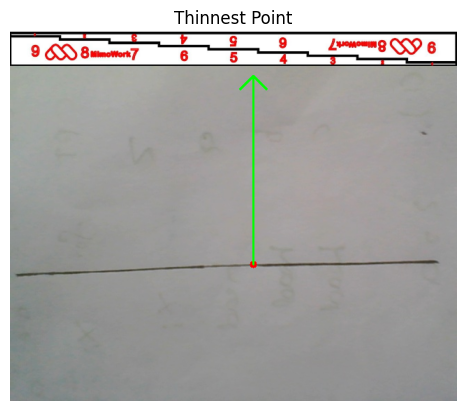

Value measured for the thinnest point on the ruler: 5


In [77]:
# Calculating and displaying the output
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Thinnest Point')
plt.axis('off')  
plt.show()
parts = 9
width_part = line_fruler.shape[1] // parts
value = parts - (thinnest_point[0] // width_part)
print("Value measured for the thinnest point on the ruler:", value)